## Library

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load DMV Dataframe

In [148]:
df = pd.read_excel ('dmv.xlsx')

In [154]:
df.head()

Data Year          County Fuel Type  MAKE   MODEL  Number of Vehicles
0       1998     Los Angeles  Electric  FORD  RANGER                   1
1       1998          Orange  Electric  FORD  RANGER                   1
2       1998  San Bernardino  Electric  FORD  RANGER                   2
3       1998       San Mateo  Electric  FORD  RANGER                   1
4       1999   Santa Barbara  Electric  FORD  RANGER                   1

## EDA

### Check for Missing Values

In [178]:
# Check for missing values
df.isnull().sum()

year      0
county    0
type      0
brand     0
model     0
count     0
dtype: int64

### Number of Instances

In [180]:
len(df['model'])

9754

### Remove hydrogen vehicles in the dataset

In [155]:
# Filter the rows with Hydrogen Fuel Type 
df = df[df['Fuel Type'] != 'Hydrogen']

# Sanity Check
set(df['Fuel Type'])

{'Electric', 'PHEV'}

* After filtering the rows, we have 9,754 instances

### Change column names

In [156]:
# Lower case column names
df.columns = df.columns.str.lower()

# Change column names
df = df.rename(columns={'data year': 'year', 'fuel type': 'type', 'make':'brand', 'number of vehicles':'count'})

### Group by Data frame by year for time series

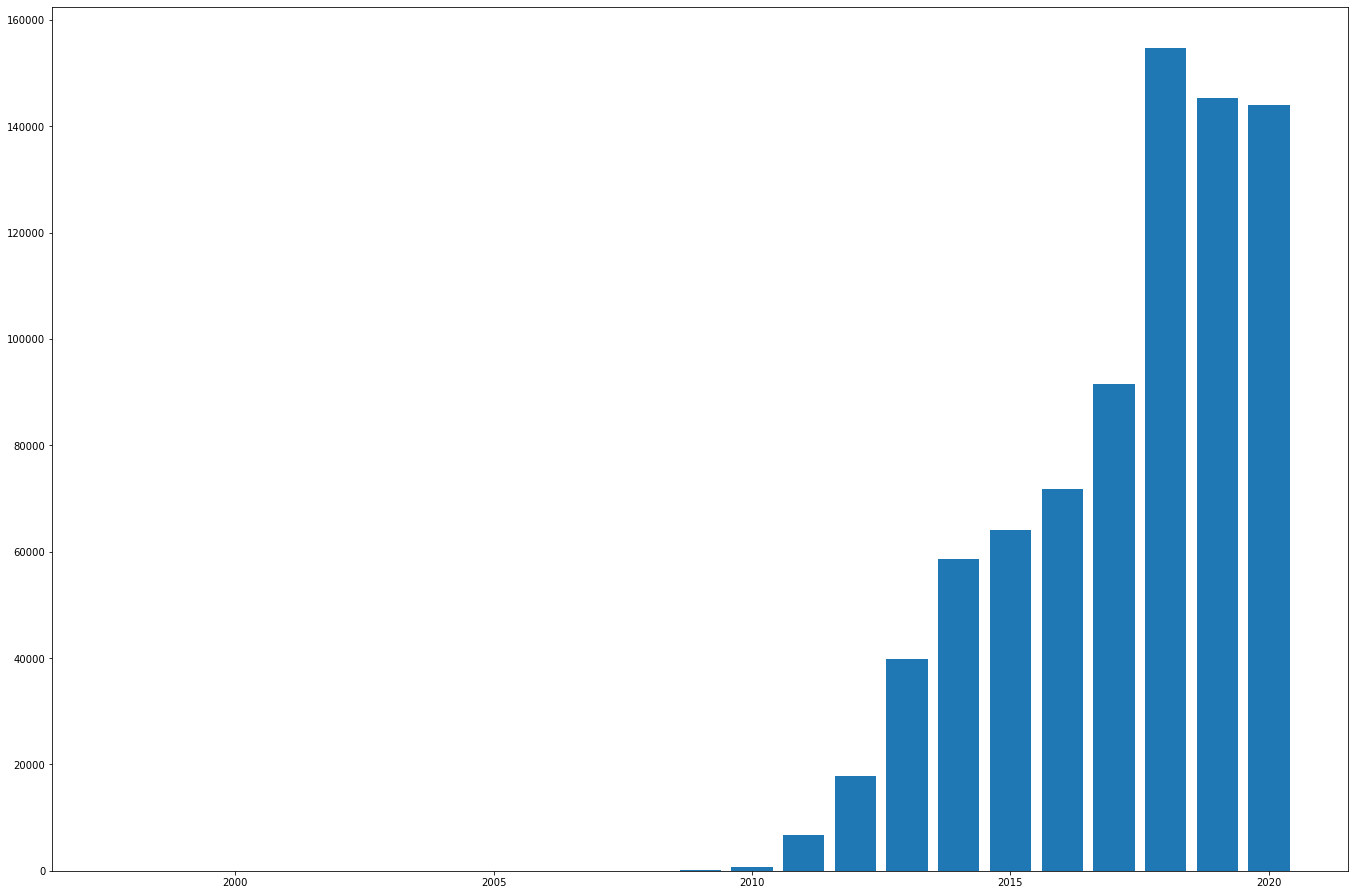

In [157]:
models = list(set(df['model']))
years = list(set(df['year']))

# Group by year
df_new = df.groupby('year')['count'].sum()

# Plot a barplot
fig = plt.figure()
ax = fig.add_axes([3,3,3,3])
langs = years
ax.bar(langs,list(df_new[:]))
plt.show()

### Histogram of Total Number of Clean Vehicles Registerd by Model

In [158]:
# Convert original dataframe in to a new one group by model column
df_model = df.groupby('model')['count'].sum().to_frame().reset_index()

# New column with percentage of the total count of clean vehicles purchased
df_model['percent'] = (df_model['count']/df_model['count'].sum())*100

# Sort by the count of model purchased in descending order
df_model = df_model.sort_values(by=['count'],ascending=True).reset_index().drop(columns=['index'])

# Temporary data frame with model and type column
df_temp = df[['model','type']].drop_duplicates()

# Left join from df_model to df_temp
result = pd.merge(df_model, df_temp, how="left", on=["model", "model"])

# One data frame for EV and another for Plug-in hybrid
phev_df = result.copy()
ev_df = result.copy()

phev_df.loc[phev_df['type'] != 'PHEV', 'count'] = 0
ev_df.loc[ev_df['type'] != 'Electric', 'count'] = 0

In [174]:
phev_df

model  count    percent      type
0             1      1   0.000126      PHEV
1            A7      2   0.000252      PHEV
2          A8 L     20   0.002516      PHEV
3            P1     24   0.003019      PHEV
4      Bentayga     27   0.003396      PHEV
..          ...    ...        ...       ...
77  Prius Prime  43722   5.499173      PHEV
78         LEAF      0   6.716809  Electric
79      Model S      0   9.207549  Electric
80         VOLT  76496   9.621352      PHEV
81      Model 3      0  19.614497  Electric

[82 rows x 4 columns]

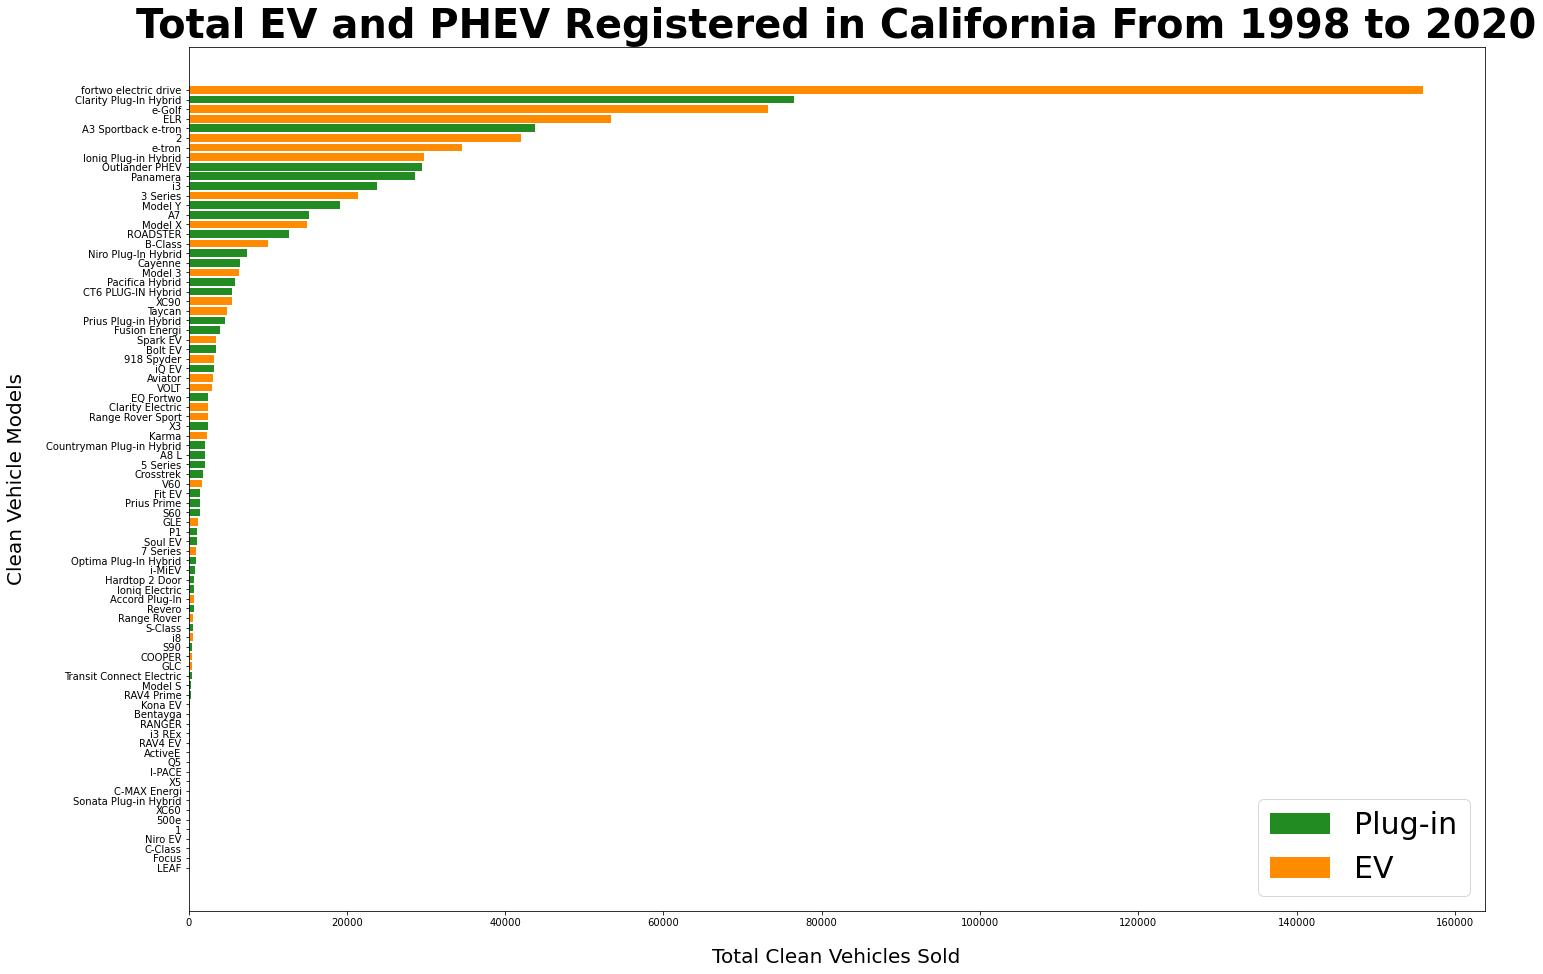

In [171]:
# Plot a histogram
fig = plt.figure()
ax = fig.add_axes([3,3,3,3])
langs = models
bar1 = ax.barh(langs,list(phev_df['count']),color='forestgreen',label='Plug-in')
bar2 = ax.barh(langs,list(ev_df['count']),color='darkorange',label='EV')
ax.legend(fontsize='large', prop={'size': 30},loc = 4)

# Set x-axis label
ax.set_xlabel("Total Clean Vehicles Sold", labelpad=20, size=20)

# Set y-axis label
ax.set_ylabel("Clean Vehicle Models", labelpad=20, size=20)

# Title label
ax.set_title("Total EV and PHEV Registered in California From 1998 to 2020",size=40,weight='bold')


plt.show()

### Histogram of % of Clean Vehicles Registerd by Model

In [175]:
# One data frame for EV and another for Plug-in hybrid
phev_df = result.copy()
ev_df = result.copy()

phev_df.loc[phev_df['type'] != 'PHEV', 'percent'] = 0
ev_df.loc[ev_df['type'] != 'Electric', 'percent'] = 0

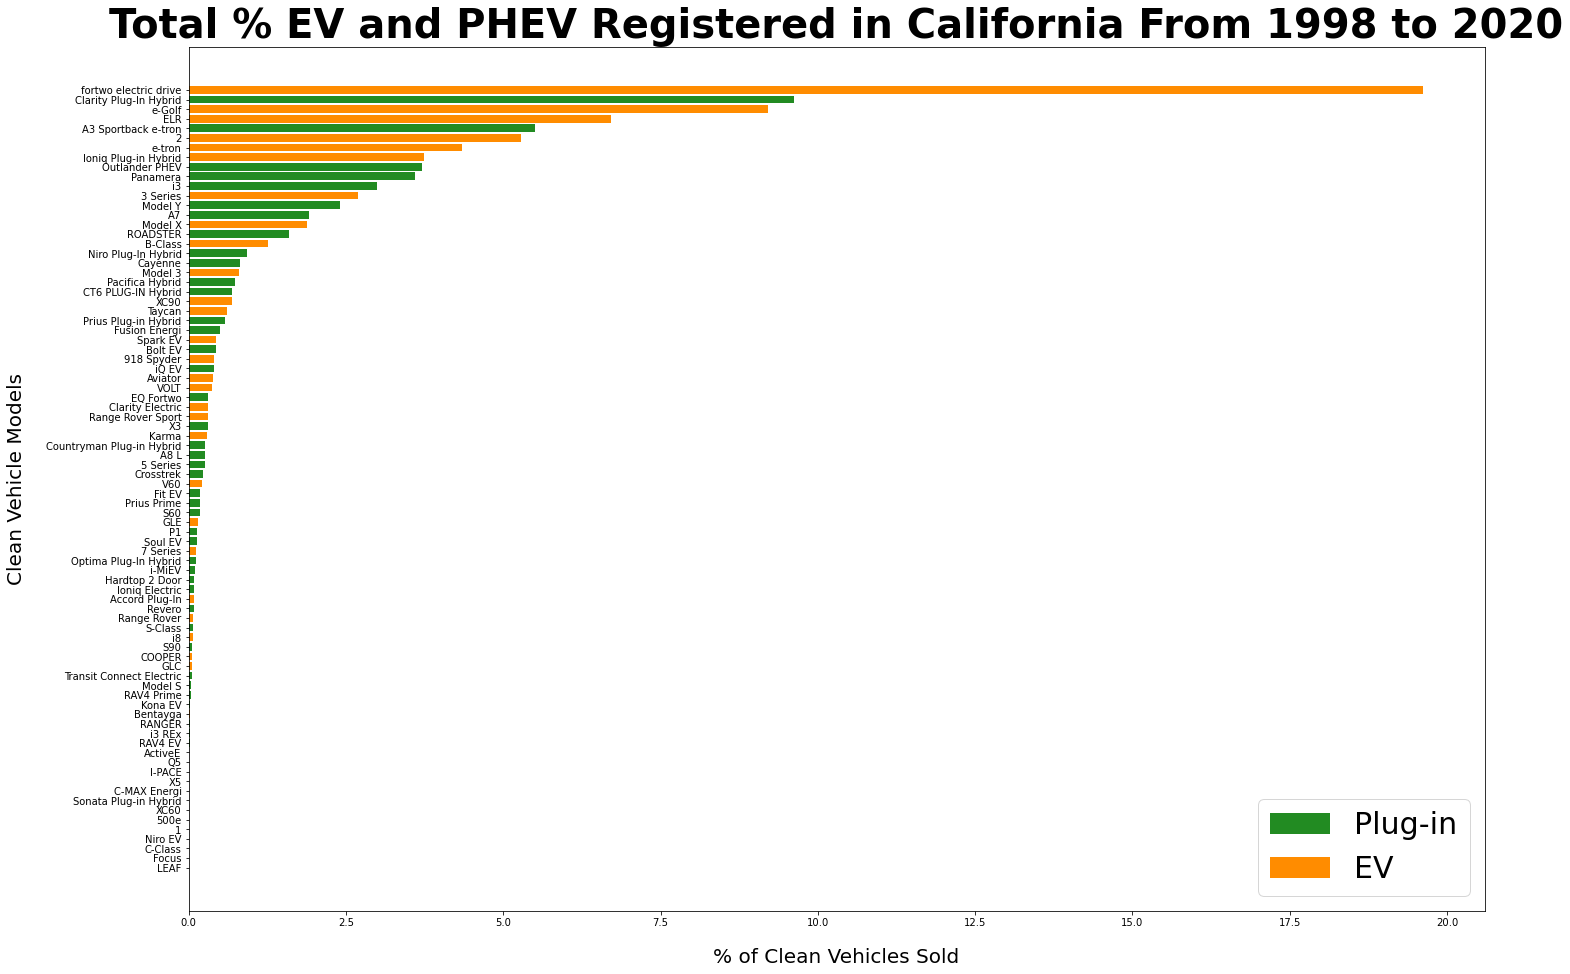

In [176]:
# Plot a histogram
fig = plt.figure()
ax1 = fig.add_axes([3,3,3,3])
langs = models
ax1.barh(langs,list(phev_df['percent']),color='forestgreen',label='Plug-in')
ax1.barh(langs,list(ev_df['percent']),color='darkorange',label='EV')
ax1.legend(fontsize='large', prop={'size': 30},loc = 4)

# Set x-axis label
ax1.set_xlabel("% of Clean Vehicles Sold", labelpad=20, size=20)

# Set y-axis label
ax1.set_ylabel("Clean Vehicle Models", labelpad=20, size=20)

# Title label
ax1.set_title("Total % EV and PHEV Registered in California From 1998 to 2020",size=40,weight='bold')

plt.show()